In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import models, layers

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("lakshmi25npathi/imdb-dataset-of-50k-movie-reviews")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/imdb-dataset-of-50k-movie-reviews


In [ ]:
# Verify the dataset path
df = pd.read_csv(path + "/IMDB Dataset.csv")

In [4]:
df.sample(5)

,review,sentiment
33708,It is by far the most definitive film on the p...,positive
35938,There wasn't a 0 in the voting option so i was...,negative
39945,"This show lasted for most of the 1980s, and ha...",negative
4009,I really enjoyed Girl Fight. It something I co...,positive
679,"""Milo"" is yet another answer to a question nob...",negative


In [5]:
df.shape

(50000, 2)

In [6]:
df.isna().sum()

,0
review,0
sentiment,0


In [7]:
X = df.iloc[:, 0]
y = df.iloc[:, -1]

In [8]:
y = df['sentiment'].map({'positive': 1, 'negative': 0})


In [9]:
X

,review
0,One of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...
2,I thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is..."
...,...
49995,I thought this movie did a down right good job...
49996,"Bad plot, bad dialogue, bad acting, idiotic di..."
49997,I am a Catholic taught in parochial elementary...
49998,I'm going to have to disagree with the previou...


In [10]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [11]:
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(X)

In [12]:
sequences = tokenizer.texts_to_sequences(X)


In [13]:
X_padd = pad_sequences(sequences, maxlen=500, padding="post")

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X_padd, y, test_size=0.2, random_state=42)

In [16]:
model = models.Sequential([
  layers.Embedding(5000, 16, input_length=200),
  layers.GlobalAveragePooling1D(),
  layers.Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [17]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [18]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.5854 - loss: 0.6696 - val_accuracy: 0.7232 - val_loss: 0.5434
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7920 - loss: 0.4962 - val_accuracy: 0.8494 - val_loss: 0.3982
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8500 - loss: 0.3823 - val_accuracy: 0.8736 - val_loss: 0.3348
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8622 - loss: 0.3386 - val_accuracy: 0.8771 - val_loss: 0.3094
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8801 - loss: 0.3039 - val_accuracy: 0.8825 - val_loss: 0.2917
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8876 - loss: 0.2873 - val_accuracy: 0.8889 - val_loss: 0.2773
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8969 - loss: 0.2655 - val_accuracy: 0.8771 - val_loss: 0.2889
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8958 - loss: 0.26

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [20]:
# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Mean Absolute Error: {test_mae}")

# Get predictions on the test set
y_pred = model.predict(X_test)

# Convert predictions to class labels
y_pred_labels = np.argmax(y_pred, axis=1)  # Get the index of the highest probability

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred_labels)
mse = mean_squared_error(y_test, y_pred_labels)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_labels)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8951 - loss: 0.2601
Test Loss: 0.25830957293510437
Test Mean Absolute Error: 0.8967000246047974
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Mean Absolute Error (MAE): 0.5039
Mean Squared Error (MSE): 0.5039
Root Mean Squared Error (RMSE): 0.7098591409568521
R-squared (R2): -1.015722636565208


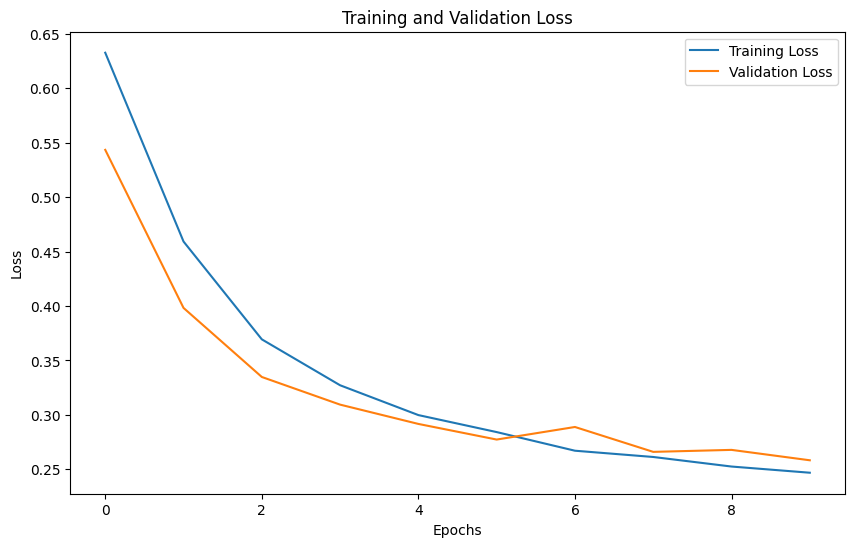

In [23]:
# Visualization: Actual vs. Predicted values
# plt.figure(figsize=(10, 6))
# plt.scatter(y_test, y_pred_labels)
# plt.xlabel("Actual Values")
# plt.ylabel("Predicted Values")
# plt.title("Actual vs. Predicted Values")
# plt.show()

# Visualization: learning curves.
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()